# Deep learning - DE3 final Lab (Evaluation) 

This project belongs to the NLP domain. The task is straightforward: assign the correct job category to a job description. This is thus a multi-class classification task with 28 classes to choose from.
The data has been retrieved from CommonCrawl. The latter has been famously used to train OpenAI's GPT-3 model. The data is therefore representative of what can be found on the English speaking part of the Internet. The goal of this project is to design a solution that accurate to predict the job based on the job descriptions. 

## Evaluation

First of all, solutions are evaluated according to the Macro F1 metric, The Macro F1 score is simply the arithmetic average of the F1 score for each class.

## Datasets

**data.json**
Contains job descriptions as well as genders for the training set, which contains 217,197 samples. If you're using pandas, then you can easily open this with pd.read_json.

**label.csv**
Contains job labels for the training set.

**categories_string.csv**
Provides a mapping between job labels and label integers

In [1]:
# Import modules
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# montage gdrive pour colab
# from google.colab import drive
# drive.mount('/content/gdrive')

In [3]:
# !cat /proc/cpuinfo
# !cat /proc/meminfo

## Baseline 1 (no deep learning)

For this part we propose to train and test a straightforward logistic regression model on the tf-idf vectors extracted from the corpus. We are not applying any particular pre-processing to start and will progressively try to reduce the dimension of the vocabulary.

In [4]:
# Read all three files to obtain three dataframes (pandas)

# read train.json
df = pd.read_json("../data/train.json")

# read label
label = pd.read_csv("../data/label.csv")

# read categories_string
categories = pd.read_csv("../data/categories_string.csv")

In [5]:
# Display the 3 first rows of each dataframe
print(df.head(6))
print(label.head(6))
print(categories.head(6))

   Id                                        description gender
0   0   She is also a Ronald D. Asmus Policy Entrepre...      F
1   1   He is a member of the AICPA and WICPA. Brent ...      M
2   2   Dr. Aster has held teaching and research posi...      M
4   3   He runs a boutique design studio attending cl...      M
5   4   He focuses on cloud security, identity and ac...      M
7   5   He is author of several books, including the ...      M
   Id  Category
0   0        19
1   1         9
2   2        19
3   3        24
4   4        24
5   5        22
                  0  1
0            pastor  0
1             model  1
2      yoga_teacher  2
3           teacher  3
4  personal_trainer  4
5           painter  5


In [6]:
# Add a column in df based on the column Category from the label dataframe
#df['label'] = label['Category']
df = pd.merge(df, label, on='Id')

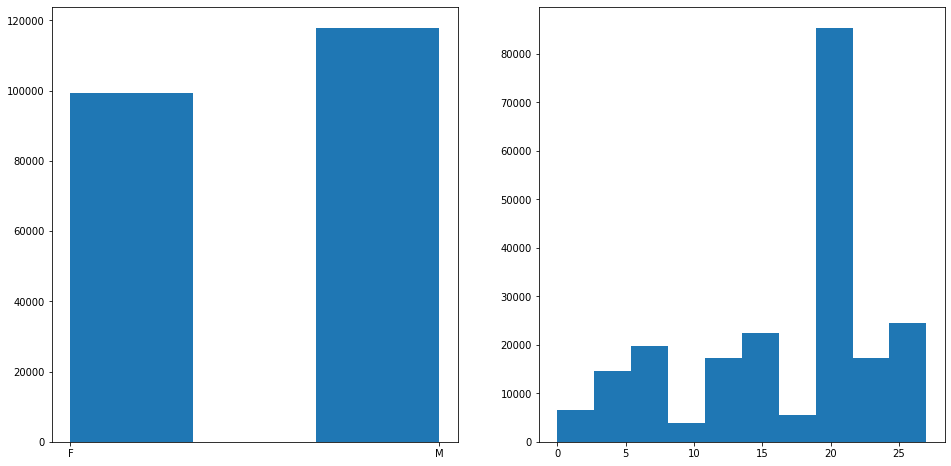

In [7]:
# Visualize the distribution of the gender attribute and the Category one using appropriate graphics (barplot)
# Example of visualisation libraries: seaborn, matplotlib etc. 

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.hist(df['gender'], bins=3);
plt.subplot(1, 2, 2)
plt.hist(df['Category']);

**What do you observe ?**

Your answer: 

The distibution of gender is quite symetrical between male and female, but there are more men than women. For the category, there are some over-represented and some under-represented categories. This inequality can be problematic for the prediction step.

For the following part, let's focus on the top-5 jobs (category). 

In [8]:
# Create a new dataframe based on `df` but that contains observations that belongs to the top-5 most frequent jobs. 
top_5 = df['Category'].value_counts().index.values[:5]
df_top5 = df[df['Category'].isin(top_5)]

In [9]:
# Lets convert the text to lower case to reduce the size of the vocabulary
df_top5.loc[:,"description_lower"] = [x.lower() for x in df_top5.description]

C:\Users\pierr\PycharmProjects\TP_Deep_Learning\venv\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [10]:
# Split the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(df_top5["description_lower"], 
                                                    df_top5["Category"], test_size=0.33, random_state=42)

In [11]:
# Convert the text to tf-idf vectors 
transformer = TfidfVectorizer()
transformer.fit(X_train.values)
print("NB features: %d" %(len(transformer.vocabulary_)))
X_train = transformer.transform(X_train.values)
X_test = transformer.transform(X_test.values)

NB features: 121369


In [12]:
# Check the shape of X_train and y_train
print("Taille de X_train: " + str(X_train.shape))
print("Taille de y_train: " + str(y_train.shape))

Taille de X_train: (86027, 121369)
Taille de y_train: (86027,)


In [13]:
# Fit a logistic regression model on X_train with 2000 max iterations
model = LogisticRegression(random_state=42, max_iter=2000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [14]:
# Check the macro f1-score
test_f1 = f1_score(y_test, y_pred, average='macro')
print('Macro F1:  %0.3f' % test_f1)

Macro F1:  0.897


## What about pre-processing ? 

Let's try basic pre-processing for textual data. 
- removing stop words
- lemmatization 
- stemmatization 

To proceed we can use the `nltk` library for instance (other alternatives : `sklearn`, `spacy`)

In [15]:
# Import nltk and the list of stop words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

# Take a look at the list
print(list(stop))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pierr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# Remove stop words from df 
df_top5['description_wo_stop'] = df_top5["description_lower"].apply(
    lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))

C:\Users\pierr\PycharmProjects\TP_Deep_Learning\venv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_top5["description_wo_stop"], 
                                                    df_top5["Category"], test_size=0.33, random_state=42)

In [18]:
# Tf-idf vectorization
transformer = TfidfVectorizer(stop_words=list(stop)).fit(X_train.values)
print("NB features: %d" %(len(transformer.vocabulary_)))
X_train = transformer.transform(X_train.values)
X_test = transformer.transform(X_test.values)

NB features: 121237


In [19]:
# Logistic regression - Same as before
model = LogisticRegression(random_state=42, max_iter=2000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

test_f1 = f1_score(y_test, y_pred, average='macro')
print('Macro F1:  %0.3f' % test_f1)

Macro F1:  0.897


**What do you observe ?**

Your answer : First we see that the number of words in the vocabulary is less important, as we've removed the stopwords. 
But the impact of removing stopwords on the result is really small.

In [25]:
# Let add some more pre-processing. 

from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
import re
nltk.download('wordnet')
nltk.download('omw-1.4')


lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    # Lowercase text
    sentence = sentence.lower()
    # Remove whitespace
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    # Remove weblinks
    rem_url=re.sub(r'http\S+', '',cleantext)
    # Remove numbers
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    #stem_words=[stemmer.stem(w) for w in filtered_words]
    #lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pierr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\pierr\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


**Describe the different pre-processing methods used by the `preprocess` function**

Your answer: 

In [26]:
# Let's apply the function to our data
df_top5['description_pre']=df_top5['description'].map(lambda s:preprocess(s)) 

KeyboardInterrupt: 

Following the same steps as before, split the data into a train and a test set. They learn a logistic regression and print the f1 score obtained. 

In [24]:
# Your answer
X_train, X_test, y_train, y_test = train_test_split(df_top5["description_pre"], 
                                                    df_top5["Category"], test_size=0.33, random_state=42)

model = LogisticRegression(random_state=42, max_iter=2000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

test_f1 = f1_score(y_test, y_pred, average='macro')
print('Macro F1:  %0.3f' % test_f1)

KeyError: 'description_pre'

**What do you observe ?**

Your answer: Even if the data is "cleaner" due to the eavier preprocessing, we dont observe better performance. The fit/predict might be less sloow but the prepocessing step is very long so this is not worth.

In [ ]:
# Let's try to tune the regularisation parameter of our model. 

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Initialize the model
...

# Define the grid search
...

# Summarize results
...

## Let's dive into Deep Learning

### Transformers and attention mechanisms
The paper ‘Attention Is All You Need’ describes transformers and what is called a 
sequence-to-sequence architecture. Sequence-to-Sequence (or Seq2Seq) is a neural net that transforms
a given sequence of elements, such as the sequence of words in a sentence, into another sequence. 

Seq2Seq models are particularly good at translation, where the sequence of words from one language is transformed into a sequence of different words in another language. A popular choice for this type of model is Long-Short-Term-Memory (LSTM)-based models. With sequence-dependent data, the LSTM modules can give meaning to the sequence while remembering (or forgetting) the parts it finds important (or unimportant). Sentences, for example, are sequence-dependent since the order of the words is crucial for understanding the sentence. LSTM are a natural choice for this type of data.

Seq2Seq models consist of an Encoder and a Decoder. The Encoder takes the input sequence and maps it into a higher dimensional space (n-dimensional vector). That abstract vector is fed into the Decoder which turns it into an output sequence. The output sequence can be in another language, symbols, a copy of the input, etc. To solve the task of document classification we will use the pre-trained model **Bert**. 

#### TO DO 

1. As a first exercice, you will have to read the paper **Attention Is All You Need**, to get a general understanding of transformers. You can also look for additional resources online (tutorial, video etc.) To keep things clear I recommend to focus on transformers for NLP (text). The paper can be found [here](https://proceedings.neurips.cc/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf). 

**This step is mandatory as you will need to unserstand the basics of transformers for what will follow. In addition, you will have questions specifically related to this architecture during your last evaluation.**

2. We will then use a pre-trained model based usin the popular [Huggin Face](https://huggingface.co/docs/transformers/index) for pytorch. More precisely, we plan on using the [Bert](https://huggingface.co/docs/transformers/model_doc/bert) model. The following cells guide you toward using Bert. On top of applying the model to our data, you will have to answer a few questions along the project (including the ones above). These **questions are mandatory**. 

3. Finally, the last step is the fine-tuning. Generally speaking, fine tuning a model refers to re-training the last layers of a deep architecture on your data. Again, you will be guided on how to proceed. 

**Lets start !**
The first thing that you need to do is to install the transformers librariy 

`import sys
!{sys.executable} -m pip install transformers`

In [27]:
# Import the library
from transformers import AutoModelWithLMHead, AutoTokenizer
import torch 
from transformers import BertTokenizer

ModuleNotFoundError: No module named 'transformers'

Let's take a look at some popular pre-trained models available in Huggingface. 

1. We start with the model Camembert [Camembert](https://camembert-model.fr/) trained on french corpus by Facebook and Inria teams. 
2. GPT2 a pre-trained model for text generation
3. Bert !

**Note:** You can also directly try the online [demo](https://transformer.huggingface.co/) of the library.

In [ ]:
# Example 1 - Camembert

model_name = "camembert-base"# try also distilbert-base-cased for english
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelWithLMHead.from_pretrained(model_name)

In [ ]:
all_sequences = [f"Jacques Chirac est un {tokenizer.mask_token}", 
            f"Antoine Griezman est un {tokenizer.mask_token}",
            f"Le camembert, c'est {tokenizer.mask_token}"]

for sequence in all_sequences:
    input = tokenizer.encode(sequence, return_tensors="pt")
    mask_token_index = torch.where(input == tokenizer.mask_token_id)[1]
    token_logits = model(input).logits
    mask_token_logits = token_logits[0, mask_token_index, :]
    top_5_tokens = torch.topk(mask_token_logits, 5, dim=1).indices[0].tolist()
    for token in top_5_tokens:
        print(sequence.replace(tokenizer.mask_token, tokenizer.decode([token])))

In [ ]:
# Example 2 - GPT2 for text generation 

# Your turn : find a small example on how to use GPT2 to generate text with pytorch. 

In [ ]:
# Finally, Bert !! Let's see next time :) 